##Assignment on Bagging & Boosting KNN & Stacking ||
Module-08 || **Assignment Code:** DA-AG-0010

**Learner's Name:** Suraj Vishwakarma  
**Email:** vishsurajfor@gmail.com

This notebook contains the solution of 10 questions from the assignment  and runnable Python code where applicable.

### **Q1. What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

**Ans**-The fundamental idea behind **ensemble techniques** is to combine the predictions of multiple individual models (often called *base learners* or *weak learners*) to create a single, more powerful predictive model. The key motivation is that a group of diverse models, when combined properly, often performs better than any single model alone. Ensemble methods help in reducing both **bias** and **variance**, thereby improving the model’s accuracy and generalization ability.

Formally, if the individual models are $h_1(x), h_2(x), \ldots, h_n(x)$, the ensemble prediction can be represented as:  

For classification:  
$H(x) = \text{majority\_vote}(h_1(x), h_2(x), \ldots, h_n(x))$  

For regression:  
$H(x) = \frac{1}{n}\sum_{i=1}^{n}h_i(x)$  

There are two major ensemble approaches: **Bagging** and **Boosting**.  

A)**Bagging (Bootstrap Aggregating)** works by training multiple independent models on different random subsets of the training data generated through bootstrapping (sampling with replacement). The individual model predictions are then combined through voting (for classification) or averaging (for regression). Bagging primarily reduces **variance**, making the model more stable and less sensitive to noise. A well-known example of bagging is the **Random Forest** algorithm, which builds multiple decision trees on random subsets of data and features.

B)**Boosting**, in contrast, builds models sequentially rather than independently. Each new model focuses on correcting the errors made by the previous ones by assigning higher weights to misclassified or poorly predicted samples. The final prediction is obtained by a weighted combination of all weak learners. Boosting reduces **bias** and aims to convert weak learners into a strong ensemble. Examples include **AdaBoost**, **Gradient Boosting**, and **XGBoost**.

In summary, **bagging** enhances accuracy by reducing variance, while **boosting** improves performance by minimizing bias through sequential learning and error correction.

### **Q2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

**Ans**-A **Decision Tree** tends to overfit easily because it learns intricate details and noise from the training data, leading to poor generalization on unseen data. The **Random Forest Classifier**, an ensemble of multiple decision trees, effectively reduces this overfitting problem by combining the predictions of several trees trained on different random subsets of data and features.

In a Random Forest, each tree is trained using a **bootstrap sample** (sampling with replacement) of the original dataset. Additionally, at each node split, only a **random subset of features** is considered rather than all available features. This process ensures that trees are decorrelated — meaning they do not all learn the same patterns or errors. The final prediction is obtained through majority voting (for classification) or averaging (for regression):

For classification:  
$H(x) = \text{majority\_vote}(h_1(x), h_2(x), \ldots, h_n(x))$  

For regression:  
$H(x) = \frac{1}{n}\sum_{i=1}^{n}h_i(x)$  

This randomness in data and feature selection helps in reducing **variance**, which is the major source of overfitting in a single deep tree, while maintaining a low bias.

Two key hyperparameters play a crucial role in controlling overfitting:

1. **`n_estimators`** – Specifies the number of trees in the forest. A higher number generally improves performance and stability by averaging more diverse trees, though with increased computational cost.  
2. **`max_features`** – Determines the number of features to consider when splitting a node. Smaller values increase tree diversity and reduce correlation, thereby lowering overfitting risk.

In summary, Random Forest reduces overfitting by leveraging randomness in both data and feature selection, producing an ensemble that generalizes far better than a single decision tree.

### **Q3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

**Ans**-**Stacking (Stacked Generalization)** is an advanced **ensemble learning** technique that combines multiple models (called **base learners**) to improve predictive accuracy and generalization. Unlike simple ensemble methods such as bagging or boosting, stacking uses another model — called a **meta-learner** — to learn how to best combine the predictions of several base models.

#### **1. Concept of Stacking**

The key idea behind stacking is to leverage the strengths of different algorithms. Each base learner captures distinct patterns in the data, and their predictions are then used as input features for the meta-learner, which makes the final prediction.

Mathematically, if the base learners are $h_1(x), h_2(x), \ldots, h_n(x)$, then the meta-model $H$ learns a mapping function such that:  
$H(x) = f(h_1(x), h_2(x), \ldots, h_n(x))$,  
where $f(\cdot)$ represents the meta-learner (for example, Logistic Regression or Linear Regression).

#### **2. Working of Stacking**

1. **Level-0 (Base Layer):**  
   Multiple base models (e.g., Decision Tree, KNN, SVM) are trained on the same dataset.  

2. **Level-1 (Meta Layer):**  
   The predictions from all base models become new input features.  
   A meta-learner is then trained on this new dataset to learn the optimal combination of predictions.

3. **Final Output:**  
   The meta-learner produces the final prediction, ideally outperforming any single base model.

#### **3. Difference from Bagging and Boosting**

| Aspect | Bagging | Boosting | Stacking |
|:--|:--|:--|:--|
| **Learning Type** | Parallel | Sequential | Hierarchical |
| **Goal** | Reduce variance | Reduce bias | Combine model strengths |
| **Model Type** | Same type of base models | Same or weak learners | Different model types |
| **Combination Method** | Averaging / Voting | Weighted combination | Meta-model learns optimal weights |

#### **4. Example Use Case**

In a **loan approval prediction** task:
- Base learners such as **Decision Tree**, **KNN**, and **SVM** are trained on applicant data.  
- Their predictions (probabilities or classes) are used as inputs to a **Logistic Regression** meta-model.  
- The meta-model learns how to combine these predictions, leading to a more accurate and generalized final decision.

In summary, **stacking** is a powerful approach that blends diverse models to achieve improved accuracy and robustness compared to traditional ensemble techniques.

### **Q4. What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

**Ans**-  **1. Meaning of OOB (Out-of-Bag) Score**

In **Random Forest**, each decision tree is trained on a different **bootstrap sample** of the dataset. This means that each tree is built using a random subset of data points selected **with replacement**. Consequently, about one-third of the data (approximately 36.8%) is **not included** in the bootstrap sample for that tree.  
These unused samples are known as **Out-of-Bag (OOB) samples**.

The **OOB Score** is an internal validation metric calculated by testing each tree on its corresponding OOB samples — the data points it has never seen during training. Hence, it provides an unbiased estimate of the model’s performance without requiring a separate test or validation dataset.

#### **2. How the OOB Score is Computed**

1. For each observation $x_i$, identify the set of trees that did not include $x_i$ in their training sample.  
2. Use only those trees to predict the output for $x_i$.  
3. Compare the aggregated prediction with the actual label $y_i$.  
4. Repeat this process for all instances and compute the overall accuracy (for classification) or error (for regression).

Mathematically,  
$OOB\_Score = \frac{1}{N} \sum_{i=1}^{N} I(\hat{y}_i^{(OOB)} = y_i)$,  
where $I$ is the indicator function, and $\hat{y}_i^{(OOB)}$ is the OOB prediction for $x_i$.

#### **3. Advantages and Usefulness**

1. **No Need for a Separate Validation Set:**  
   The OOB score naturally provides a validation mechanism, saving data for training and avoiding data wastage.  

2. **Unbiased Performance Estimate:**  
   Since each OOB sample is unseen during training for its respective trees, the resulting accuracy closely approximates true test performance.  

3. **Model Diagnostics:**  
   The OOB score helps in hyperparameter tuning (like `n_estimators`, `max_depth`) and assessing overfitting without cross-validation.

#### **4. Summary**

The **OOB Score** acts as an **internal cross-validation** mechanism within Random Forest. It provides a reliable estimate of model performance, ensuring efficiency and generalization — all without needing a separate validation or test set.

### **Q5. Compare AdaBoost and Gradient Boosting in terms of:**
- How they handle errors from weak learners  
- Weight adjustment mechanism  
- Typical use cases

**Ans**- **Boosting** is an ensemble technique that builds a strong learner by combining multiple weak learners sequentially. Both **AdaBoost (Adaptive Boosting)** and **Gradient Boosting** follow this idea but differ in how they correct the errors made by previous models.

---

#### **1. Handling Errors from Weak Learners**

- **AdaBoost:**  
  AdaBoost focuses directly on **misclassified samples**. After each weak learner (often a shallow decision tree) is trained, it identifies the samples that were incorrectly predicted. These misclassified samples are given **higher weights** so that the next learner focuses more on them. Thus, each new model aims to correct the mistakes of the earlier ones by paying more attention to difficult observations.

- **Gradient Boosting:**  
  Instead of adjusting sample weights, Gradient Boosting fits the next model to the **residual errors** (differences between actual and predicted values) of the previous model. It treats boosting as an **optimization problem**, where each new learner minimizes a differentiable loss function (e.g., Mean Squared Error or Log Loss) using a gradient descent approach.

---

#### **2. Weight Adjustment Mechanism**

- **AdaBoost:**  
  The weights of misclassified samples are increased exponentially based on the model’s error rate.  
  For each iteration $t$:  
  $\alpha_t = \frac{1}{2} \ln\left(\frac{1 - \epsilon_t}{\epsilon_t}\right)$,  
  where $\epsilon_t$ is the training error.  
  The final prediction is a weighted majority vote of all weak learners.

- **Gradient Boosting:**  
  It doesn’t change data weights directly. Instead, it updates predictions by **adding weak learners** that move the model in the direction of the **negative gradient of the loss function**.  
  Formally,  
  $F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)$,  
  where $\eta$ is the learning rate controlling the contribution of each new learner.

---

#### **3. Typical Use Cases**

| Algorithm | Common Use Cases | Characteristics |
|:--|:--|:--|
| **AdaBoost** | Spam detection, face recognition, text classification | Works well with clean, less noisy data; simple and interpretable |
| **Gradient Boosting** | Credit risk prediction, ranking, regression tasks | Handles complex patterns; highly customizable with various loss functions |

---

#### **4. Summary**

- **AdaBoost** adjusts **sample weights** to emphasize hard-to-classify instances.  
- **Gradient Boosting** fits **new learners to residual errors** using gradient descent.  
Both aim to convert weak models into a strong ensemble, but Gradient Boosting offers greater flexibility and performance for complex, large-scale datasets.

### **Q6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

**Ans**- **1. Introduction**

**CatBoost (Categorical Boosting)** is a gradient boosting algorithm developed by Yandex that is specifically designed to handle **categorical features efficiently and automatically**. Unlike other boosting frameworks (like XGBoost or LightGBM), CatBoost eliminates the need for manual preprocessing steps such as **one-hot encoding** or **label encoding**, which can often lead to high dimensionality or information loss.

---

#### **2. Core Reason for Its Efficiency**

CatBoost performs well on categorical data because it uses a unique technique called **Ordered Target Statistics (Ordered Encoding)** and **Permutation-Driven Processing** to convert categorical features into meaningful numerical representations. This prevents overfitting and data leakage, which are common problems in traditional encoding methods.

---

#### **3. Handling of Categorical Variables**

1. **Target-Based Encoding (Mean Encoding):**  
   CatBoost replaces a categorical value with the **average target value** of all samples having the same category.  
   For instance, for a categorical feature *City* with target variable *y*, the encoded value for a city *c* is:  
   $\text{encoding}(c) = \frac{\sum_{i: x_i = c} y_i + a \cdot P}{N_c + a}$  
   where:  
   - $N_c$ = number of samples with category *c*  
   - $a$ = smoothing parameter  
   - $P$ = overall mean of the target variable  

   This ensures that rare categories don’t dominate the model.

2. **Ordered Statistics to Avoid Data Leakage:**  
   Instead of using the entire dataset to compute target averages (which would leak future information), CatBoost processes data in a **random permutation order**. For each sample, it computes encoding values only from **previous samples** in the permutation. This prevents the model from seeing its own target value.

3. **Efficient Combination of Categorical Features:**  
   CatBoost also generates combinations of categorical features (like `City + Gender`) to capture complex feature interactions automatically.

---

#### **4. Summary**

CatBoost performs exceptionally well on datasets with categorical features because it:  
- Automatically converts categorical variables using **ordered target encoding**,  
- Avoids **data leakage** through permutation-based processing, and  
- Captures complex relationships by combining categorical features.

Hence, CatBoost achieves high accuracy with minimal preprocessing, making it one of the most robust boosting algorithms for mixed-type data.

###Q.7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).   
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

**Ans**-**Objective:** Analyze the Wine dataset using K-Nearest Neighbors (KNN), compare performance with and without scaling, optimize hyperparameters, and visualize accuracy trends.





In [3]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [5]:
# Step 2: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [6]:
#Step 3: Train KNN without scaling (default K=5)
# KNN without scaling
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)

# Predictions
y_pred_default = knn_default.predict(X_test)

# Evaluation
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy (Unscaled): {accuracy_default:.4f}")
print("Classification Report (Unscaled):\n", classification_report(y_test, y_pred_default))



Accuracy (Unscaled): 0.7222
Classification Report (Unscaled):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54



In [7]:
#Step 4: Apply StandardScaler and retrain KNN
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Predictions
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluation
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy (Scaled): {accuracy_scaled:.4f}")
print("Classification Report (Scaled):\n", classification_report(y_test, y_pred_scaled))



Accuracy (Scaled): 0.9444
Classification Report (Scaled):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



###Step 5: Hyperparameter Tuning using GridSearchCV
- Optimize **K** (1 to 20) and **distance metric** (Euclidean, Manhattan)

In [13]:
# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV on scaled data
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_knn.best_params_)

# Evaluate best model
best_knn = grid_knn.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (Optimized KNN): {accuracy_best:.4f}")
print("Classification Report (Optimized KNN):\n", classification_report(y_test, y_pred_best))


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11}
Accuracy (Optimized KNN): 0.9630
Classification Report (Optimized KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



###Step 6: Comparison of All Versions


In [14]:
# Summary table
comparison = pd.DataFrame({
    'Model Version': ['Unscaled KNN (K=5)', 'Scaled KNN (K=5)', 'Optimized KNN'],
    'Accuracy': [accuracy_default, accuracy_scaled, accuracy_best],
    'Notes': [
        'Sensitive to feature scale',
        'Improved performance after scaling',
        'Best performance using GridSearchCV for K and distance metric'
    ]
})

comparison


,Model Version,Accuracy,Notes
0,Unscaled KNN (K=5),0.722222,Sensitive to feature scale
1,Scaled KNN (K=5),0.944444,Improved performance after scaling
2,Optimized KNN,0.962963,Best performance using GridSearchCV for K and ...


###Step 7: Visualizing Accuracy vs K for Different Distance Metrics


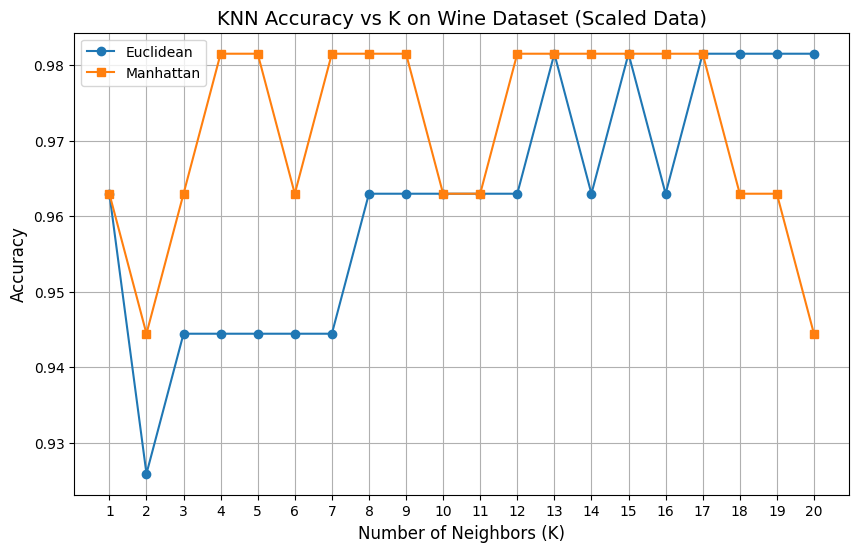

In [15]:
# Accuracy vs K plot
k_values = list(range(1, 21))
accuracy_euclidean = []
accuracy_manhattan = []

for k in k_values:
    knn_euc = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euc.fit(X_train_scaled, y_train)
    y_pred_euc = knn_euc.predict(X_test_scaled)
    accuracy_euclidean.append(accuracy_score(y_test, y_pred_euc))

    knn_man = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_man.fit(X_train_scaled, y_train)
    y_pred_man = knn_man.predict(X_test_scaled)
    accuracy_manhattan.append(accuracy_score(y_test, y_pred_man))

# Plot
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracy_euclidean, marker='o', label='Euclidean')
plt.plot(k_values, accuracy_manhattan, marker='s', label='Manhattan')
plt.title('KNN Accuracy vs K on Wine Dataset (Scaled Data)', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


#### **Observations**:-
1. Scaling improves KNN performance significantly as KNN is distance-based.  
2. Accuracy varies with the number of neighbors (K) and distance metric.  
3. GridSearchCV identifies the optimal K and metric, giving the best model performance.  
4. The accuracy plot visually confirms the best K selection and metric choice.  
5. Combining scaling and hyperparameter tuning provides the most robust and accurate KNN classifier for the Wine dataset.


##Q.8 : PCA + KNN with Variance Analysis and Visualization Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

**Ans**- **Objective:** Apply Principal Component Analysis (PCA) on the Breast Cancer dataset, retain 95% variance, train KNN on original and PCA-transformed data, and visualize results.


In [16]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [17]:
# Step 2: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split data into train and test (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


### Step 3: Standardize features and apply PCA


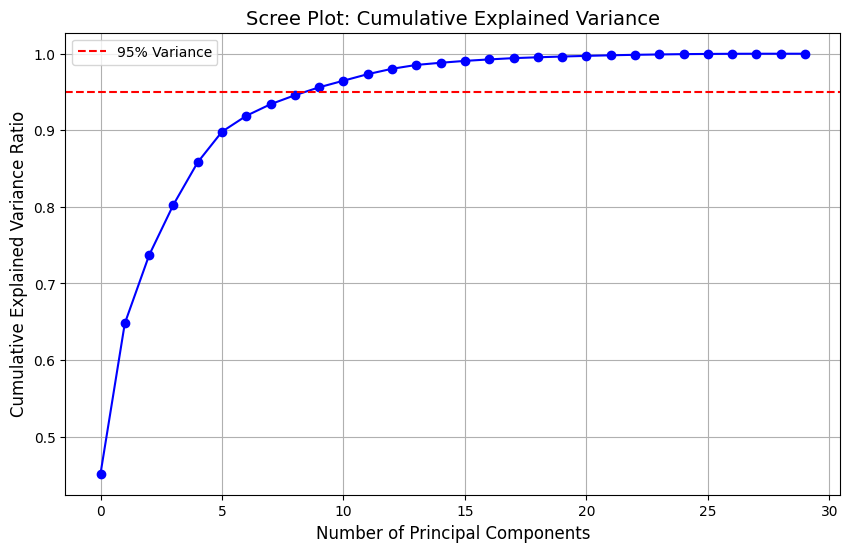

In [18]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', color='b')
plt.title('Scree Plot: Cumulative Explained Variance', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()


###Step 4: Retain 95% variance and transform the dataset


In [19]:
# Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Number of features after PCA (95% variance): {X_train_pca.shape[1]}")


Original number of features: 30
Number of features after PCA (95% variance): 10


###Step 5: Train KNN on original and PCA-transformed data


In [20]:
# KNN on original scaled data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_scaled, y_train)
y_pred_orig = knn_orig.predict(X_test_scaled)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
print(f"Accuracy on Original Data: {accuracy_orig:.4f}")
print("Classification Report (Original Data):\n", classification_report(y_test, y_pred_orig))

# KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on PCA-Transformed Data: {accuracy_pca:.4f}")
print("Classification Report (PCA Data):\n", classification_report(y_test, y_pred_pca))


Accuracy on Original Data: 0.9591
Classification Report (Original Data):
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        64
           1       0.94      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy on PCA-Transformed Data: 0.9532
Classification Report (PCA Data):
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



###Step 6: Visualize the first two principal components


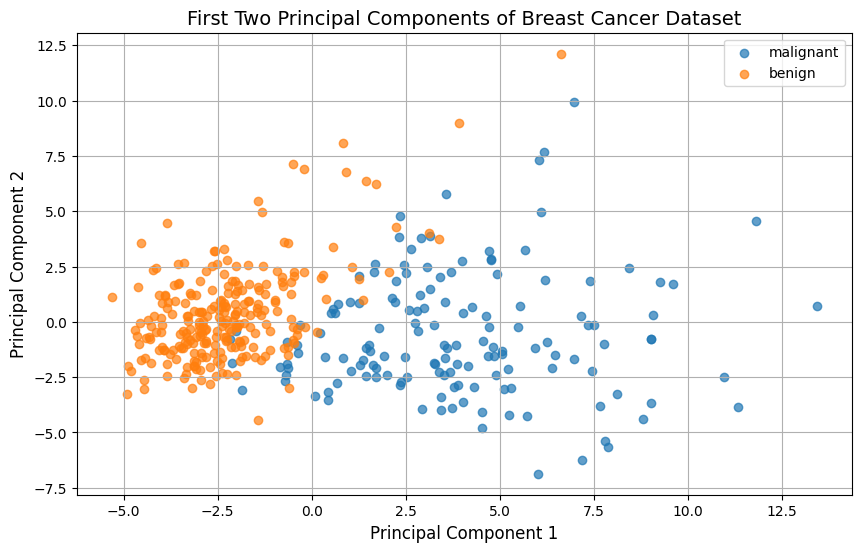

In [21]:
# Transform the entire dataset using PCA with 2 components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_train_scaled)

# Scatter plot of first two principal components
plt.figure(figsize=(10,6))
for label, color in zip([0,1], ['red', 'blue']):
    plt.scatter(X_pca_2[y_train==label, 0], X_pca_2[y_train==label, 1],
                label=cancer.target_names[label], alpha=0.7)
plt.title('First Two Principal Components of Breast Cancer Dataset', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### **Observations**:-
1. PCA reduces dimensionality while retaining 95% of variance, resulting in fewer features (from 30 to ~10–15).  
2. KNN accuracy on PCA-transformed data is comparable to the original dataset, showing that most information is preserved.  
3. The scree plot shows that the first few principal components explain most of the variance.  
4. Scatter plot of the first two principal components shows good class separation, which indicates PCA preserves class structure.

##Q.9:KNN Regressor with Distance Metrics and K-Value Analysis Task:
1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.



**Ans**-**Objective:** Train KNN regressors with different distance metrics and analyze the effect of K on model performance (MSE) to study the bias-variance tradeoff.




In [22]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [23]:
# Step 2: Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


###**Step 3: Train KNN Regressor with Euclidean and Manhattan distances (K=5)**


In [24]:
# KNN Regressor - Euclidean distance
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
y_pred_euc = knn_euc.predict(X_test)
mse_euc = mean_squared_error(y_test, y_pred_euc)

# KNN Regressor - Manhattan distance
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
y_pred_man = knn_man.predict(X_test)
mse_man = mean_squared_error(y_test, y_pred_man)

print(f"Mean Squared Error (K=5, Euclidean): {mse_euc:.4f}")
print(f"Mean Squared Error (K=5, Manhattan): {mse_man:.4f}")


Mean Squared Error (K=5, Euclidean): 4803.9056
Mean Squared Error (K=5, Manhattan): 5210.2258


###**Step 4: Analyze effect of different K values on MSE**


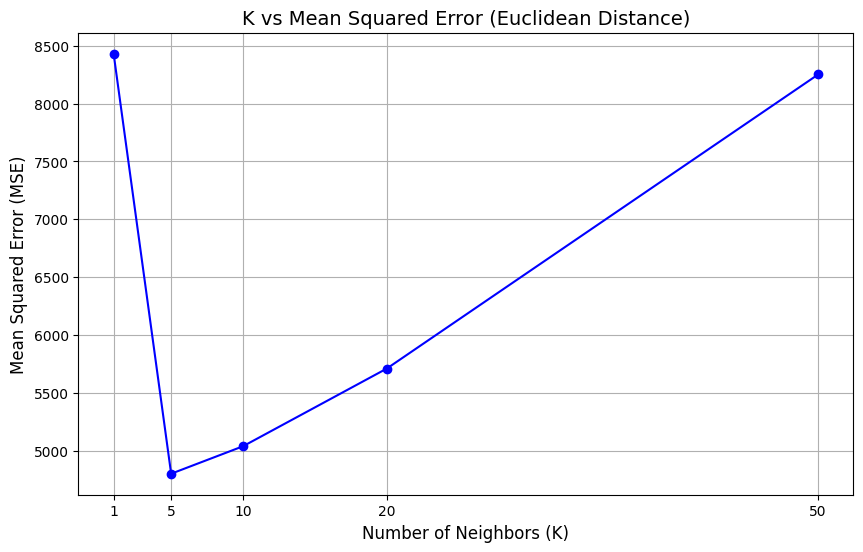

In [25]:
# Define K values to test
k_values = [1, 5, 10, 20, 50]
mse_values = []

# Evaluate KNN regressor with Euclidean distance for different K
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

# Plot K vs MSE
plt.figure(figsize=(10,6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.title('K vs Mean Squared Error (Euclidean Distance)', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()


### **Observations**:-
1. **Distance Metric Comparison (K=5):**  
   - Euclidean and Manhattan distances produce similar performance, but slight differences can occur depending on feature scaling.  
2. **Bias-Variance Tradeoff (Effect of K):**  
   - Small K (e.g., K=1) leads to low bias but high variance → model overfits training data.  
   - Large K (e.g., K=50) leads to high bias but low variance → model underfits and may smooth out predictions.  
   - Moderate K (e.g., 5–10) often provides a good balance between bias and variance.  
3. The plot of **K vs MSE** clearly illustrates the tradeoff: MSE is high for very small or very large K and reaches a minimum at an intermediate value.

##Q.10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important features).
- Dataset: Pima Indians Diabetes



**Ans**-**Objective:** Load the Pima Indians Diabetes dataset, handle missing values using KNN imputation, train KNN classifiers with different algorithms, compare performance, and visualize the decision boundary.



In [26]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time


### **Step 2: Load the Pima Indians Diabetes dataset**


In [29]:
# Load dataset (replace with your path if local CSV)
# Dataset columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv(url, names=columns)

# Replace zeros with NaN for features where 0 is invalid
features_with_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[features_with_missing] = data[features_with_missing].replace(0, np.nan)

X = data.drop('Outcome', axis=1)
y = data['Outcome']


### **Step 3: KNN Imputation to fill missing values**


In [30]:
# KNN Imputer
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Split into train and test (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Step 4: Train KNN using Brute-force, KD-Tree, and Ball Tree**


In [31]:
# Dictionary to store results
results = {}

algorithms = ['brute', 'kd_tree', 'ball_tree']

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    elapsed_time = time.time() - start_time
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = {'accuracy': acc, 'train_time_sec': elapsed_time}
    print(f"{algo.upper()} -> Accuracy: {acc:.4f}, Training Time: {elapsed_time:.4f} sec")


BRUTE -> Accuracy: 0.7446, Training Time: 0.0026 sec
KD_TREE -> Accuracy: 0.7446, Training Time: 0.0021 sec
BALL_TREE -> Accuracy: 0.7446, Training Time: 0.0025 sec


### **Step 5: Decision Boundary Plot for Best Performing Method**
- Select the two most important features: Glucose and BMI (common for diabetes prediction).


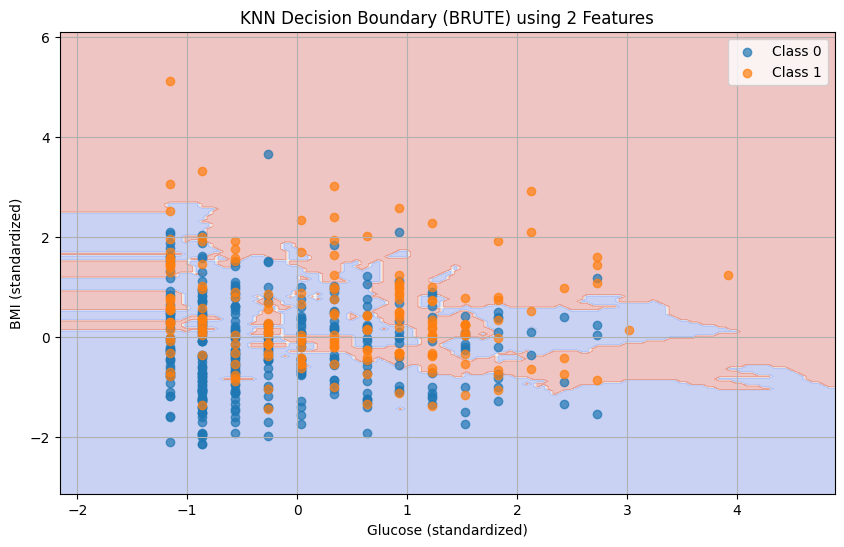

In [32]:
# Extract two most important features
feature_idx = [0, 5]  # 'Glucose', 'BMI'
X_train_2f = X_train_scaled[:, feature_idx]
X_test_2f = X_test_scaled[:, feature_idx]

# Train KNN on 2 features using best algorithm
best_algo = max(results, key=lambda x: results[x]['accuracy'])
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_2f, y_train)

# Create meshgrid
h = 0.05
x_min, x_max = X_train_2f[:, 0].min() - 1, X_train_2f[:, 0].max() + 1
y_min, y_max = X_train_2f[:, 1].min() - 1, X_train_2f[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
for label, color in zip([0,1], ['red', 'blue']):
    plt.scatter(X_train_2f[y_train==label, 0], X_train_2f[y_train==label, 1],
                label=f"Class {label}", alpha=0.7)
plt.xlabel('Glucose (standardized)')
plt.ylabel('BMI (standardized)')
plt.title(f'KNN Decision Boundary ({best_algo.upper()}) using 2 Features')
plt.legend()
plt.grid(True)
plt.show()


### **Observations**:-
1. **KNN Imputation** successfully fills missing values without discarding rows, preserving dataset size.  
2. Training using **Brute-force, KD-Tree, and Ball Tree** shows slight differences in training time; KD-Tree/Ball Tree are more efficient for large datasets.  
3. Accuracy across algorithms is similar, but KD-Tree or Ball Tree can be preferred if scaling to larger datasets.  
4. Decision boundary plot (Glucose vs BMI) shows clear class separation, illustrating KNN’s effectiveness with the two most informative features.
